In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
pd.set_option('display.max_columns', None)

# If you also want to display all rows (if needed)
pd.set_option('display.max_rows', None)


In [4]:
data=pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
data.shape

(9240, 37)

In [8]:
duplicates = data.duplicated()

In [9]:
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
9235    False
9236    False
9237    False
9238    False
9239    False
Length: 9240, dtype: bool


In [10]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]


In [11]:
duplicate_rows = data[data.duplicated(subset=['Prospect ID', 'Lead Number'])]
print(duplicate_rows)

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]


In [12]:
# Check for duplicates across multiple columns
duplicate_rows = data[data.duplicated(subset=['Prospect ID', 'Lead Source', 'Lead Number'])]
print(duplicate_rows)


Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]


In [13]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Prospect ID and Lead Number are no longer needed for further analysis since it has unique values, so we can drop it


### Exploratory Data Anlalysis

In [14]:
data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [15]:
data.shape

(9240, 35)

In [16]:
null_percentage = data.isnull().mean() * 100
null_percentage = null_percentage[null_percentage > 0]
print(null_percentage)

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

In [17]:
##For columns like Lead Source, TotalVisits, Page Views Per Visit, and Last Activity, the missing values are very few.


In [18]:
# Check unique values in each column
print("Lead Source:", data['Lead Source'].unique())

Lead Source: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']


In [19]:
print("TotalVisits:", data['TotalVisits'].unique())

TotalVisits: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]


In [20]:
print("Page Views Per Visit:", data['Page Views Per Visit'].unique())

Page Views Per Visit: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.    2.6   4.75  1.27  3.25  5.33  2.57  2.17  2.75
  2.8   2.2   2.86  3.91  1.4   5.67  3.2   1.38  2.09  2.4  55.    5.25
  6.71  3.57  2.22  1.83  3.6   1.2   1.57  1.56  5.4   4.25  1.31  1.6
  2.9   1.23  1.78  3.83  7.5   1.14  2.71  1.45  2.38  1.86  2.29  1.21
 12.33  3.43  2.56  6.33  1.64  8.21  4.4   3.17  8.33  1.48  1.22 24.
  3.75  6.67  1.54  2.13  2.14  2.45  3.29  4.17  1.63  3.38  1.17 14.5
  3.8   1.19  3.82  2.83  1.93 11.5   2.08]


In [21]:
print("Last Activity:", data['Last Activity'].unique())

Last Activity: ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']


In [22]:
## Categorical Columns
data['Lead Source'].fillna(data['Lead Source'].mode()[0], inplace=True)
data['Last Activity'].fillna(data['Last Activity'].mode()[0], inplace=True)


In [23]:
## Numerical Columns
data['TotalVisits'].fillna(data['TotalVisits'].median(), inplace=True)
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median(), inplace=True)


In [24]:
null_percentage = data.isnull().mean() * 100
null_percentage = null_percentage[null_percentage > 0]
print(null_percentage)

Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
dtype: float64


In [25]:
## Columns like Lead Quality, Tags, Asymmetrique Activity Index, and Asymmetrique Profile Score have a significant amount of missing data (over 45%).
## so we might drop the columns

In [26]:
#dropping cols with more than 45% missing values
data = data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index'],axis =1)

In [27]:
data.shape

(9240, 31)

In [28]:
null_percentage = data.isnull().mean() * 100
null_percentage = null_percentage[null_percentage > 0]
print(null_percentage)

Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
dtype: float64


In [32]:
data.shape

(9240, 29)

In [33]:
## Now handling these columns which are between 15-29%
null_percentage = data.isnull().mean() * 100
null_percentage = null_percentage[null_percentage > 0]
print(null_percentage)

Country                                          26.634199
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     29.318182
City                                             15.367965
dtype: float64


In [34]:
import pandas as pd

# Function to impute missing values based on column type
def impute_missing_values(data):
    for column in data.columns:
        if data[column].dtype == 'object':  
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:  
            data[column].fillna(data[column].median(), inplace=True)
    return data

data = impute_missing_values(data)

print(data.isnull().sum()) 


Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [35]:
data.isnull().mean()

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

#### All the columns have been treated 

In [37]:
data["Country"].value_counts()

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [38]:
data.shape

(9240, 29)

In [42]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [43]:
## categorical Attribute Analysis

In [45]:
def categorize_country(country):
    if country == 'India':
        return 'India'
    elif country in ['unknown', ''] or pd.isna(country):
        return 'Unknown'
    else:
        return 'Outside India'

data['Country'] = data['Country'].apply(categorize_country)


print(data['Country'].value_counts())

Country
India            8953
Outside India     282
Unknown             5
Name: count, dtype: int64


In [46]:
data.City.value_counts()

City
Mumbai                         4642
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [47]:
data.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [48]:
# Define the function to categorize cities
def categorize_city(city):
    if city == 'Select':
        return 'Unknown'
    else:
        return city

data['City'] = data['City'].apply(categorize_city)


print(data['City'].value_counts())


City
Mumbai                         4642
Unknown                        2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64


In [51]:
data.Country.value_counts(normalize = True, dropna = False) * 100

Country
India            96.893939
Outside India     3.051948
Unknown           0.054113
Name: proportion, dtype: float64

In [52]:
## the distribution is heavily skewed, hence it is safe to drop this column
data.drop('Country', axis = 1, inplace = True)

In [53]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Unknown,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Unknown,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [55]:
data.shape

(9240, 28)

In [56]:
data["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

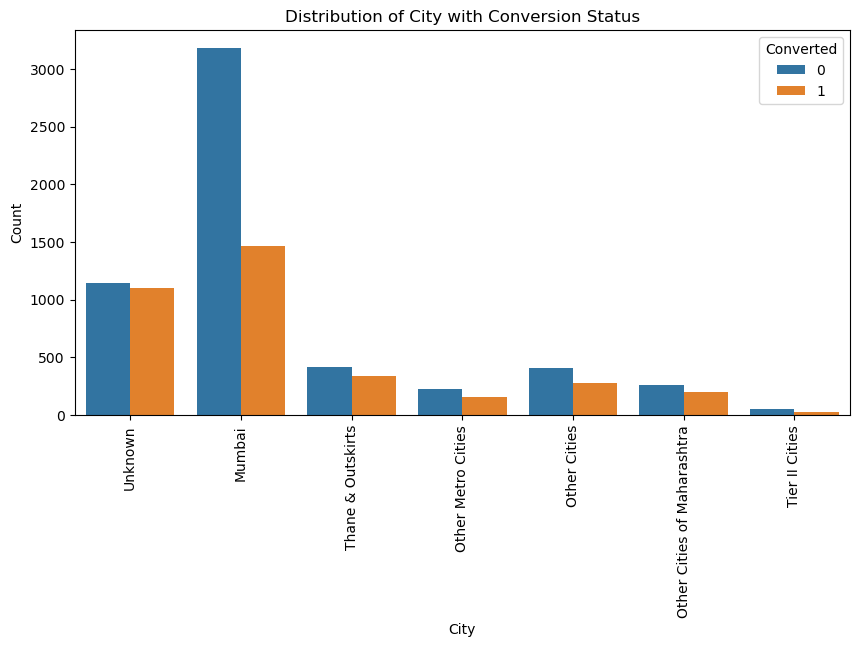

In [58]:
#plotting spread of City columnn

plt.figure(figsize=(10, 5))
s1 = sns.countplot(x='City', hue='Converted', data=data)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.title('Distribution of City with Conversion Status')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()


In [59]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Unknown,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Unknown,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


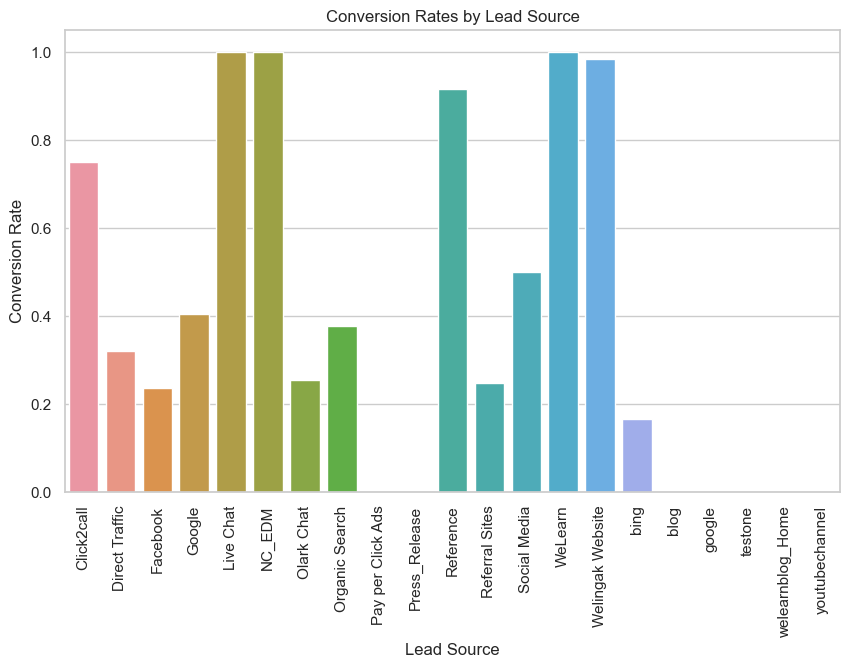

In [61]:
sns.set(style="whitegrid")

conversion_rates = data.groupby('Lead Source')['Converted'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Lead Source', y='Converted', data=conversion_rates)
plt.xticks(rotation=90)
plt.title('Conversion Rates by Lead Source')
plt.xlabel('Lead Source')
plt.ylabel('Conversion Rate')
plt.show()

### Total Visits and Conversion

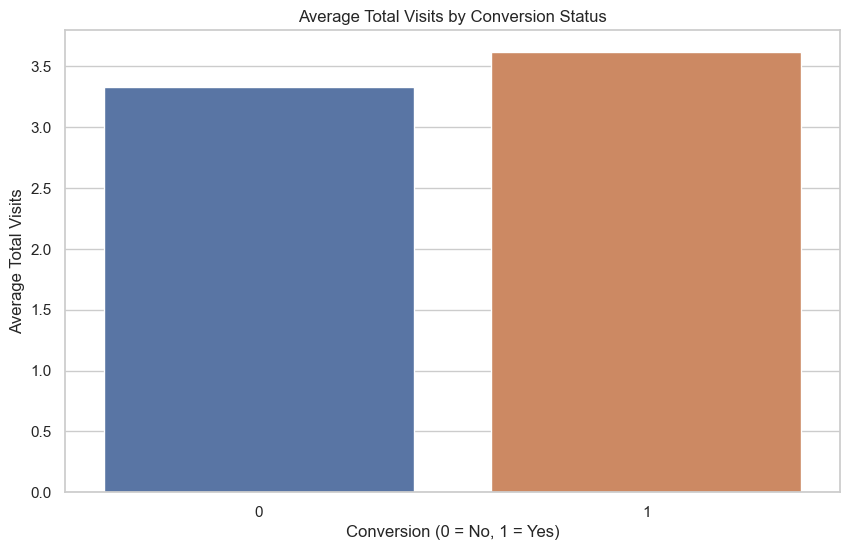

In [66]:
# Calculate the average number of total visits for each conversion status
average_visits_by_conversion = data.groupby('Converted')['TotalVisits'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Converted', y='TotalVisits', data=average_visits_by_conversion)
plt.title('Average Total Visits by Conversion Status')
plt.xlabel('Conversion (0 = No, 1 = Yes)')
plt.ylabel('Average Total Visits')
plt.show()


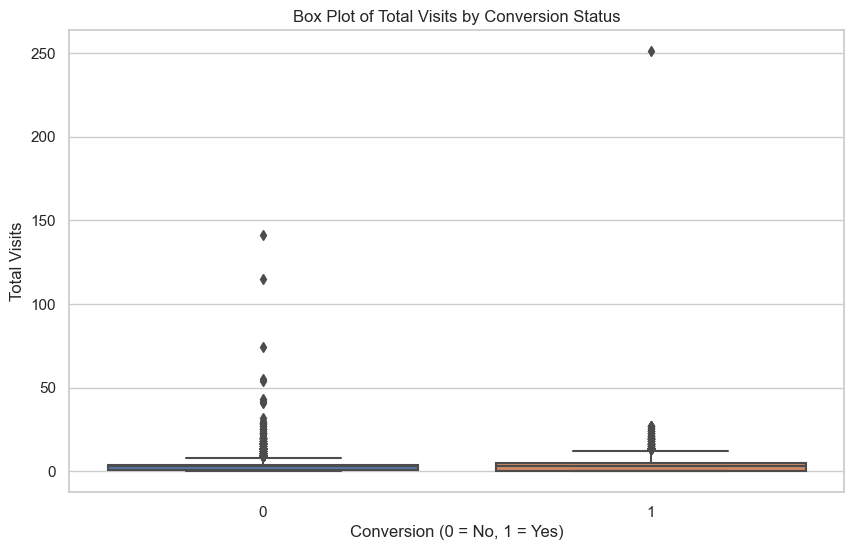

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Converted', y='TotalVisits', data=data)
plt.title('Box Plot of Total Visits by Conversion Status')
plt.xlabel('Conversion (0 = No, 1 = Yes)')
plt.ylabel('Total Visits')
plt.show()

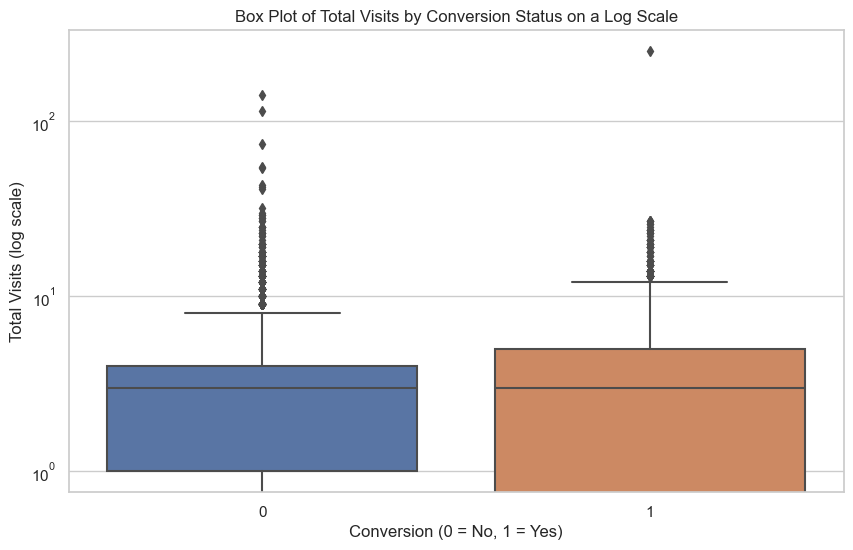

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Converted', y='TotalVisits', data=data)
plt.yscale('log')  # Setting the y-axis to a log scale
plt.title('Box Plot of Total Visits by Conversion Status on a Log Scale')
plt.xlabel('Conversion (0 = No, 1 = Yes)')
plt.ylabel('Total Visits (log scale)')
plt.show()


### Activity and Conversion

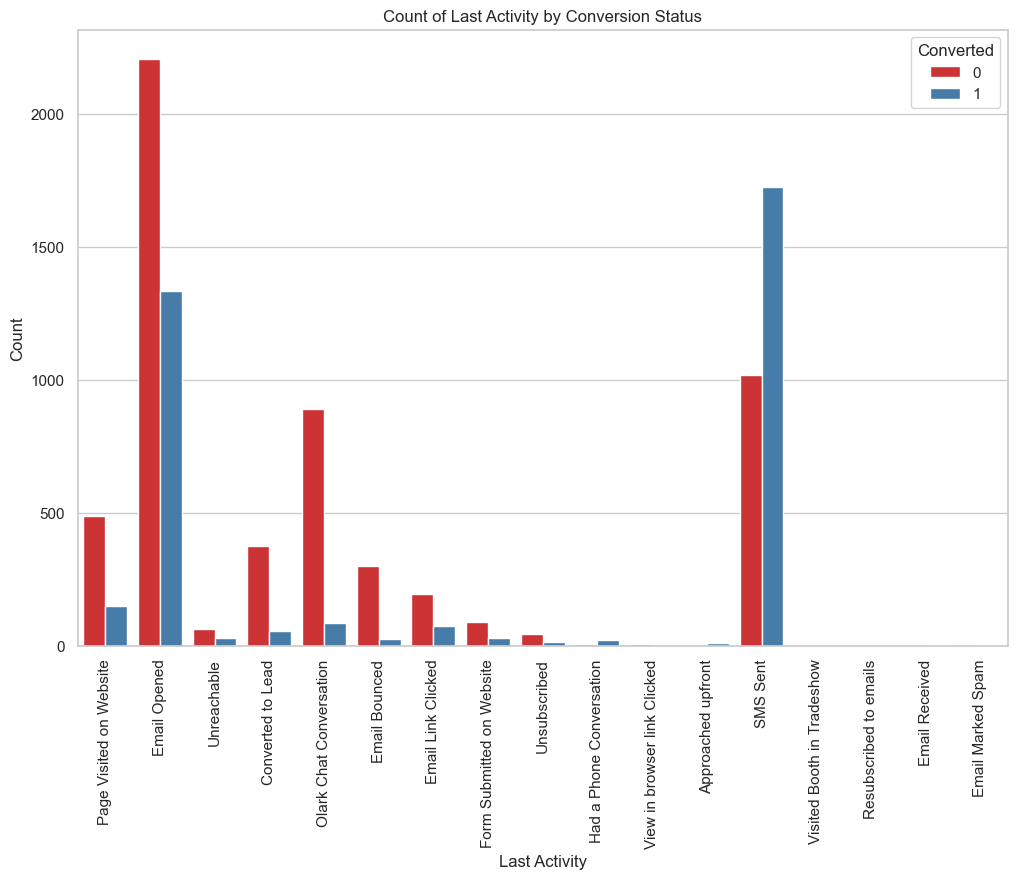

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the countplot with hue for conversion status
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
count_plot = sns.countplot(x='Last Activity', hue='Converted', data=data, palette='Set1')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=90)  # Rotate the x labels for better readability
plt.title('Count of Last Activity by Conversion Status')
plt.xlabel('Last Activity')
plt.ylabel('Count')
plt.legend(title='Converted', loc='upper right')  # Modify legend location as needed
plt.show()


### City and Conversion Rates

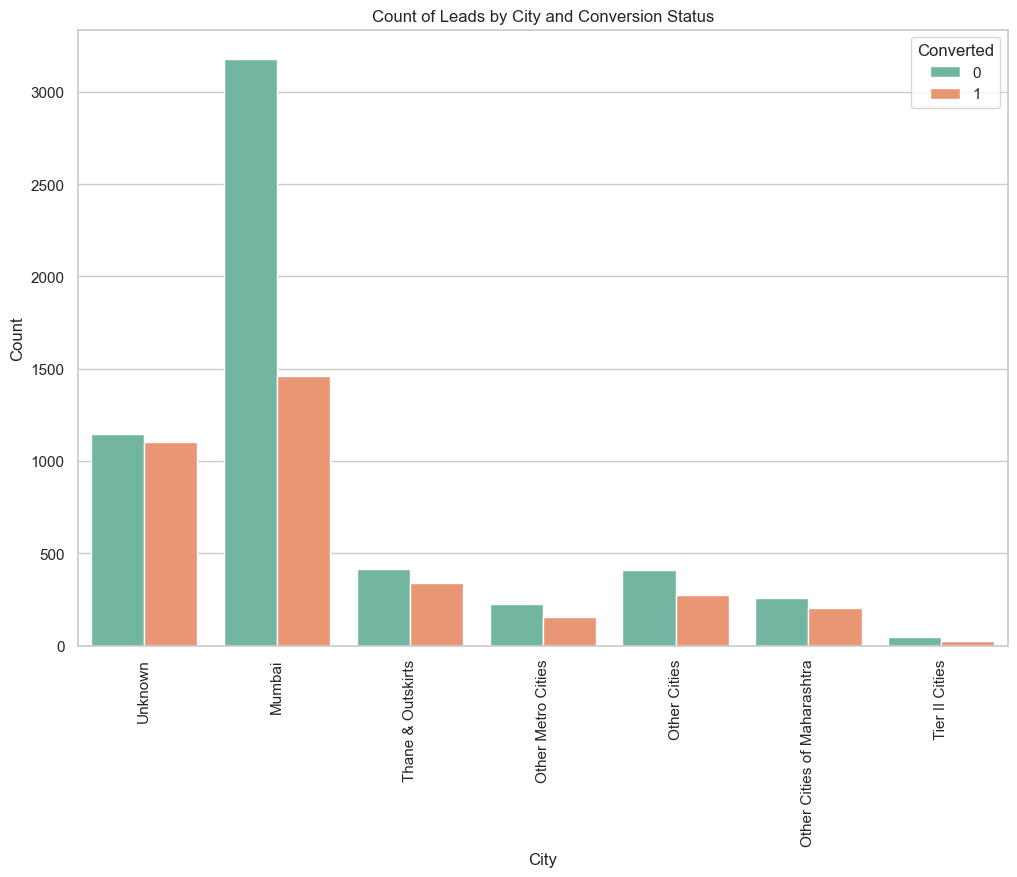

In [74]:
# Create the countplot with hue for conversion status
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
count_plot = sns.countplot(x='City', hue='Converted', data=data, palette='Set2')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=90)  # Rotate the x labels for better readability
plt.title('Count of Leads by City and Conversion Status')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Converted', loc='upper right')  # Modify legend location as needed
plt.show()


#### Conversion by Current Occupation:

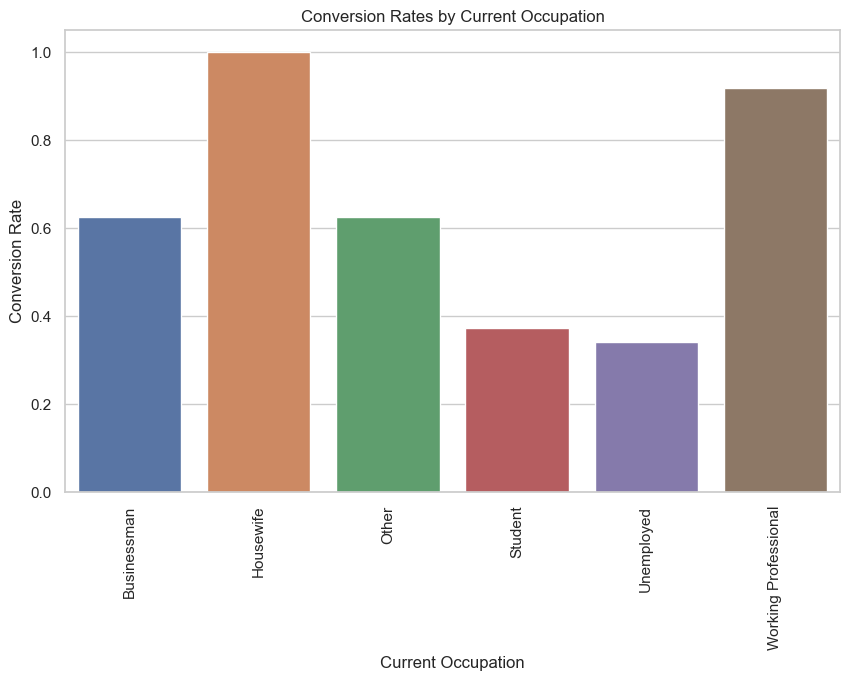

In [75]:
# Calculate conversion rate by occupation
occupation_conversion = data.groupby('What is your current occupation')['Converted'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='What is your current occupation', y='Converted', data=occupation_conversion)
plt.xticks(rotation=90)
plt.title('Conversion Rates by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Conversion Rate')
plt.show()


In [76]:
## Numerical Columns

In [78]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Unknown,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Unknown,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


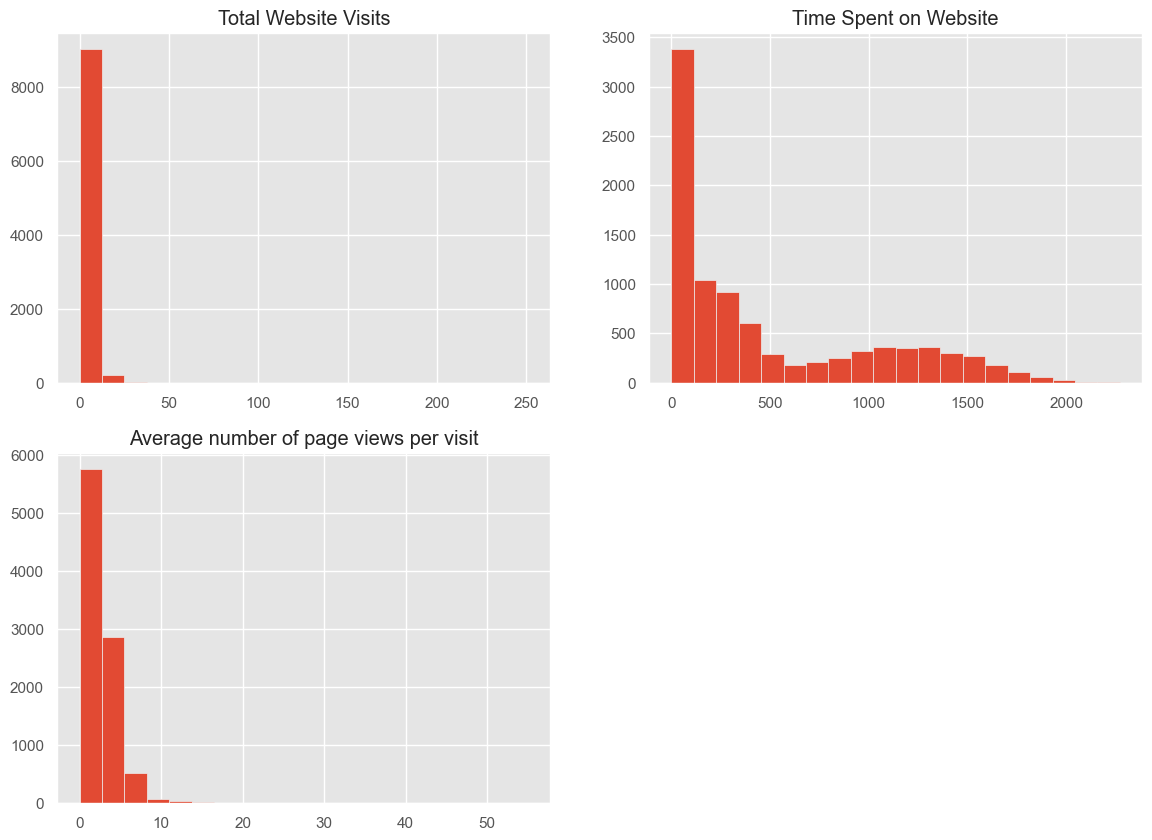

In [81]:
import matplotlib.pyplot as plt

# Set style
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize=(14, 10))

# Total Visits histogram
plt.subplot(2, 2, 1)
plt.hist(data['TotalVisits'], bins=20)
plt.title('Total Website Visits')

# Total Time Spent on Website histogram
plt.subplot(2, 2, 2)
plt.hist(data['Total Time Spent on Website'], bins=20)
plt.title('Time Spent on Website')

plt.subplot(2, 2, 3)
plt.hist(data['Page Views Per Visit'], bins = 20)
plt.title('Average number of page views per visit')

plt.show()


##### Observation:High peaks and skewed data. There might be a possibility of outliers

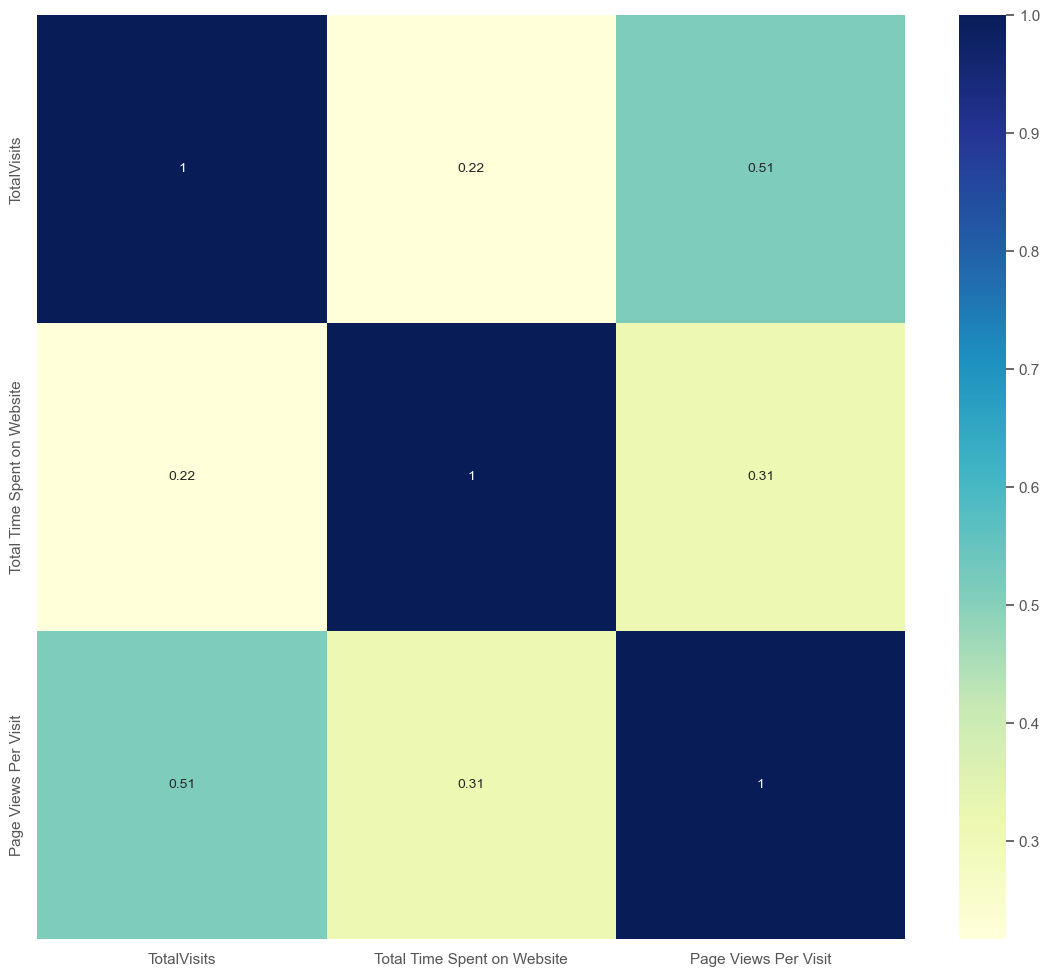

In [83]:
plt.figure(figsize = (14,12))
sns.heatmap(data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

In [84]:
## No Significant correlation between the variables

In [85]:
## Checking for Outliers

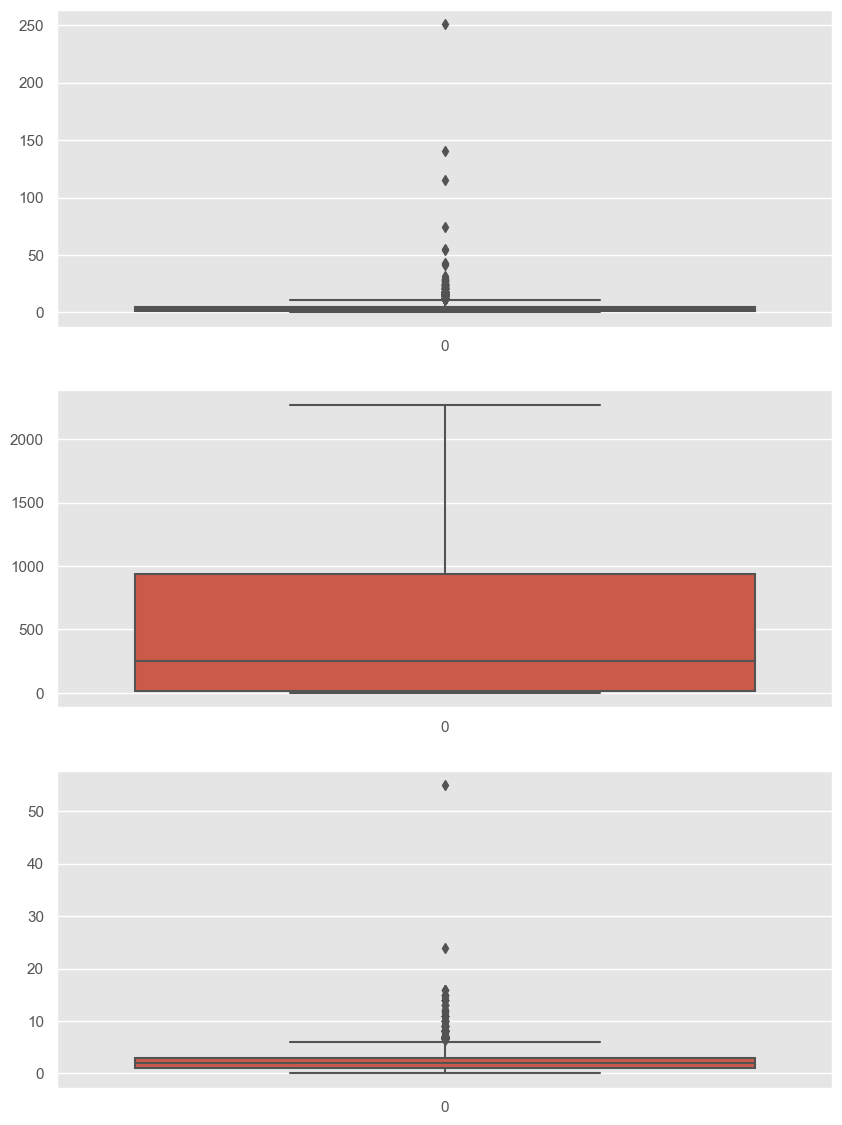

In [86]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(data.TotalVisits)

plt.subplot(3,1,2)
sns.boxplot(data['Total Time Spent on Website'])

plt.subplot(3,1,3)
sns.boxplot(data['Page Views Per Visit'])
plt.show()

In [87]:
## Looking at the boxlots, we can see that Total Visits and Page Views Per Visit both have upper bound outliers

##### Let see the Lead Origin Column with the Converted Status

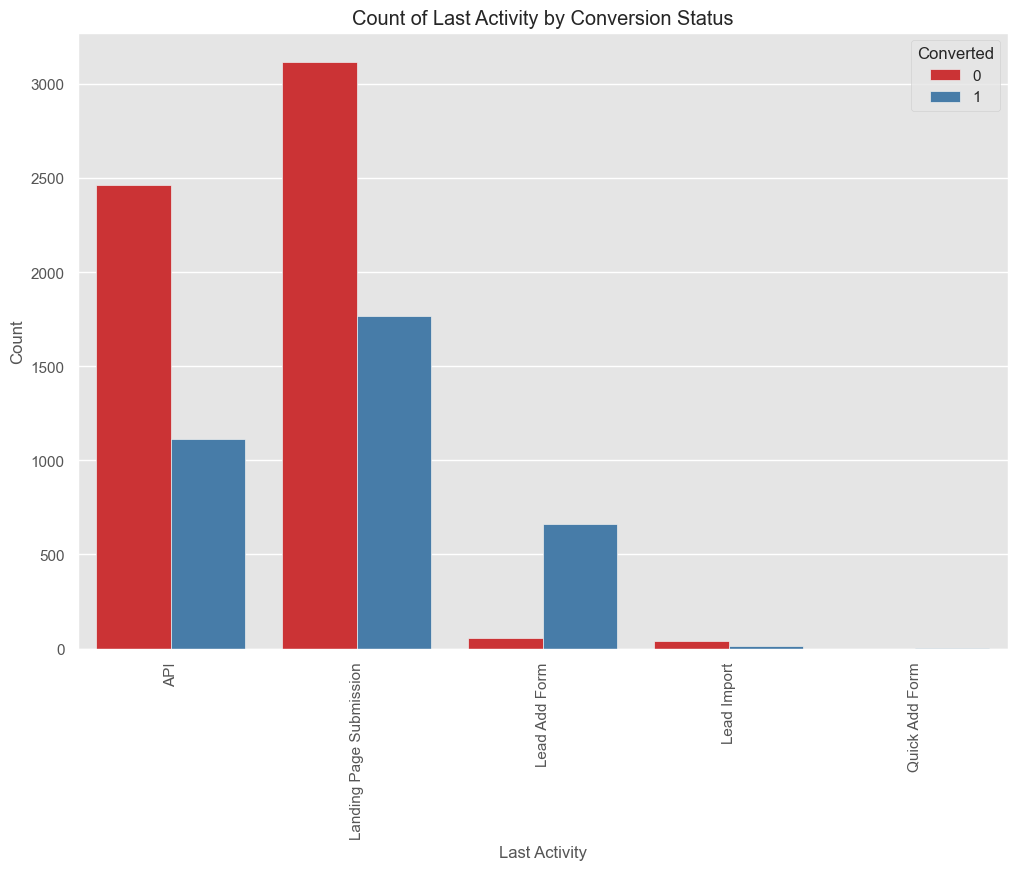

In [88]:

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
count_plot = sns.countplot(x='Lead Origin', hue='Converted', data=data, palette='Set1')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=90)  # Rotate the x labels for better readability
plt.title('Count of Lead Origin by Conversion Status')
plt.xlabel('Last Activity')
plt.ylabel('Count')
plt.legend(title='Converted', loc='upper right')  # Modify legend location as needed
plt.show()
